In [18]:
import cv2
from IPython.display import Image, display
from matplotlib.pyplot import imshow
import numpy as np
from preprocessing import *
%matplotlib inline

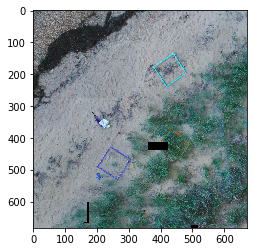

In [19]:
#Import and convert to hsv
img = cv2.imread('test2.tif')
imshow(img)

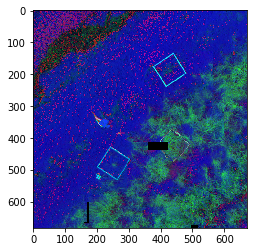

In [20]:
#Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imshow(hsv)

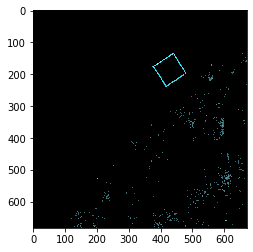

In [21]:
#Yellow color range mask
yellow_lower = np.array([20, 100, 100])
yellow_upper = np.array([30, 255, 255])
mask = cv2.inRange(hsv, yellow_lower, yellow_upper)
result = cv2.bitwise_and(img, img, mask = mask)

imshow(result)

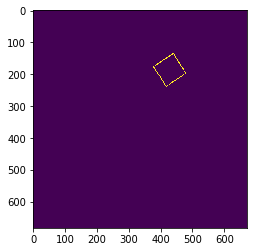

In [22]:
#Gray + Threshhold
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]
imshow(thresh)

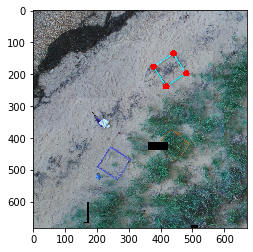

In [23]:
#good features to track
corners = cv2.goodFeaturesToTrack(thresh, 4, 0.5, 10)
corners = np.int0(corners)

circle_img = img.copy()
bb = []
for i in corners:
    x, y = i.ravel()
    bb.append((x, y))
    cv2.circle(img, (x, y), 10, 255, -1)
imshow(img)

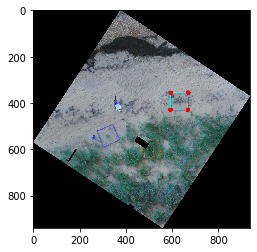

In [24]:
#Rotate until parallel
(heigth, width) = img.shape[:2]
(cx, cy) = (width // 2, heigth // 2)

bb_copy = bb.copy()
top_row = topRow(bb)

if top_row[0][1] > top_row[1][1]:
    c = -1
if top_row[0][1] < top_row[1][1]:
    c = 1

theta = 0
while round(top_row[0][1]) != round(top_row[1][1]):
    theta += 0.1*c
    bb_new = rotate_box(bb_copy, cx, cy, heigth, width, theta)
    top_row = topRow(bb_new)
rotated_img = rotate_bound(img, theta)
rotated_clean = rotate_bound(circle_img, theta)
imshow(rotated_img)

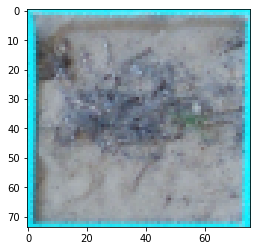

In [25]:
x1, x2, y1, y2 = Corners(bb_new)
crop = rotated_clean[y1:y2, x1:x2]
imshow(crop)